# Analiza podróży z Airbnb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [94]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
len(airbnb)

48895

In [7]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Kolumny, w których brakuje danych nie są istotne z punktu widzenia analizy. Id, host_name i last_review można odrzucić całkowicie. Reviews_per_month można wypełnić wartością 0.0.

In [95]:
airbnb = airbnb.drop(['host_name', 'id', 'last_review'], axis=1)

In [96]:
airbnb = airbnb.fillna({'reviews_per_month':0})

In [97]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Sprawdźmy unikalne wartości, które mogą być przydatne w dalszej analizie. 

In [16]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
len(airbnb['neighbourhood'].unique())

221

In [21]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Sprawdźmy, właściciel (id) host ma najwięcej pozycji.

In [24]:
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [30]:
top_host_df = pd.DataFrame(top_host)
top_host_df = top_host_df.reset_index()
top_host_df = top_host_df.rename(columns={'index': 'Host_ID', 'host_id':'P_Count'})
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


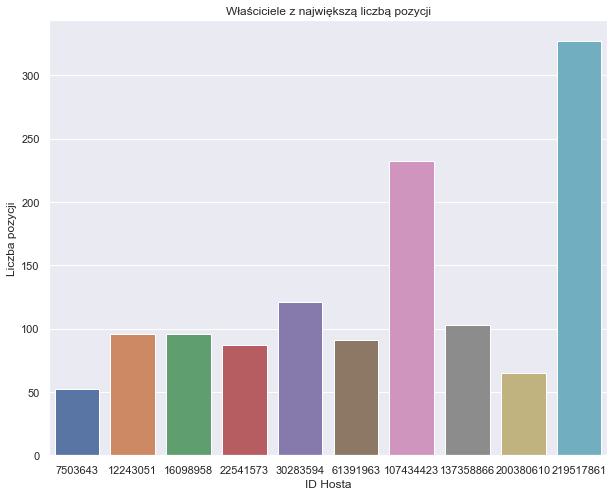

In [119]:
sns.set(rc={'figure.figsize':(10,8)})
viz_1 = sns.barplot(x='Host_ID', y='P_Count', data=top_host_df)
viz_1.set_title('Właściciele z największą liczbą pozycji')
viz_1.set_ylabel('Liczba pozycji')
viz_1.set_xlabel('ID Hosta');

Spróbujmy dowiedzieć się więcej o poszczególnych grupach dzielnic.

In [45]:
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub_1 = sub_1[['price']]
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub_2 = sub_2[['price']]
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub_3 = sub_3[['price']]
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub_4 = sub_4[['price']]
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub_5 = sub_5[['price']]

price_list_in_n = [price_sub_1, price_sub_2, price_sub_3, price_sub_4, price_sub_5]

In [59]:
price_distribution =[]
neighbourhood_list= ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for price in price_list_in_n:
    i = price.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns ={'index':'Stats'}, inplace=True)
    price_distribution.append(i)
for i in range(5):
    price_distribution[i].rename(columns={'price':neighbourhood_list[i]}, inplace=True)

In [77]:
stat_df=price_distribution

stat_df=stat_df[0].join(stat_df[1:])

stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Aby lepiej zobrazować dystrybucję cen pozbędziemy się najwyższych wartości cen.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

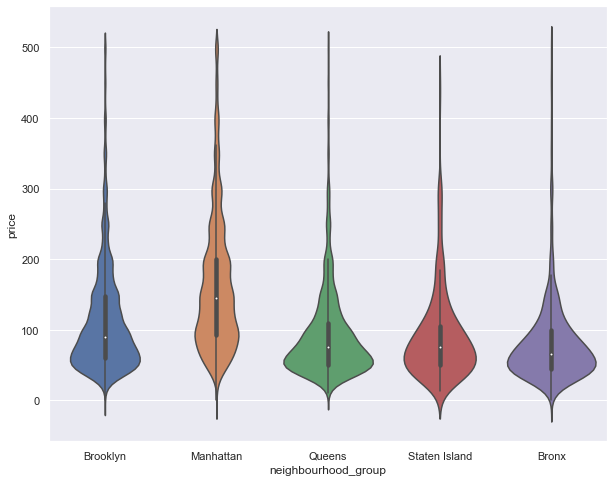

In [82]:
lower_prices= airbnb[airbnb['price'] <= 500]

sns.violinplot(x = 'neighbourhood_group', y = 'price', data=lower_prices)

Widzimy że Manhatan ma największy zakres cen jak również jest najdroższy. Na drugim koću znajduje się Bronx.
Sprawdźmy jak plasują się dzielnice i typy pokoi.

In [84]:
airbnb['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

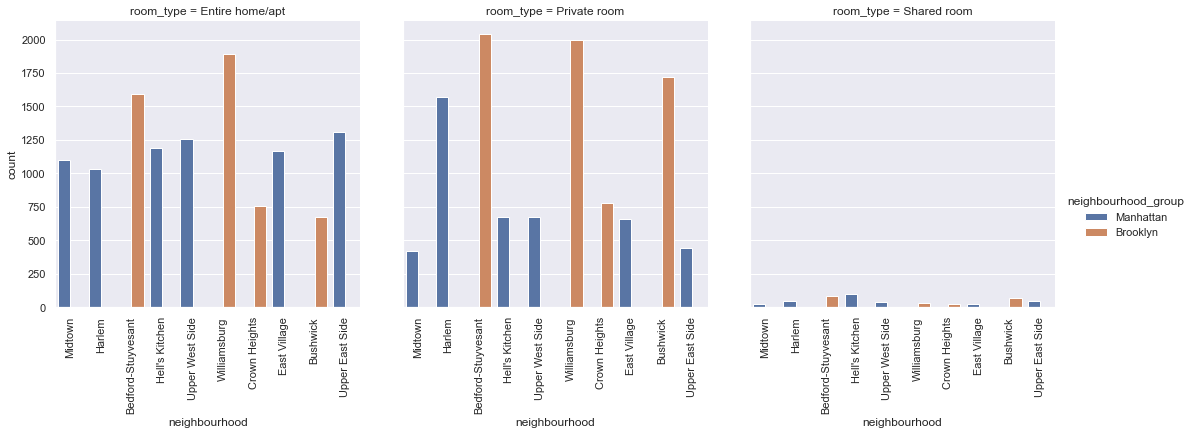

In [89]:
sub_n = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
viz = sns.catplot(x='neighbourhood', col='room_type', data=sub_n, kind='count', hue='neighbourhood_group')
viz.set_xticklabels(rotation=90) 

Manhattan i Brooklyn to dwa obszary z największą ilośćią pozycji. Dla Brooklynu Bedford-Stuyvesant i Williamsburg są na czele, dla Manhattanu jest to Harlem.
Sprawdźmy jakie słowa kluczowe występują najczęściej w ofertach.

In [103]:
key_words= []
for name in airbnb.name:
    key_words.append(name)
    
def split_words(name):
    spl = str(name).split()
    return spl
words_for_count = []

for x in key_words:
    for word in split_words(x):
        word=word.lower()
        words_for_count.append(word)
    
from collections import Counter   
top_25 = Counter(words_for_count).most_common()
top_25 = top_25[0:25]


In [112]:
top_25_df = pd.DataFrame(top_25)
top_25_df = top_25_df.rename(columns={0:'Word', 1:'Number'})

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

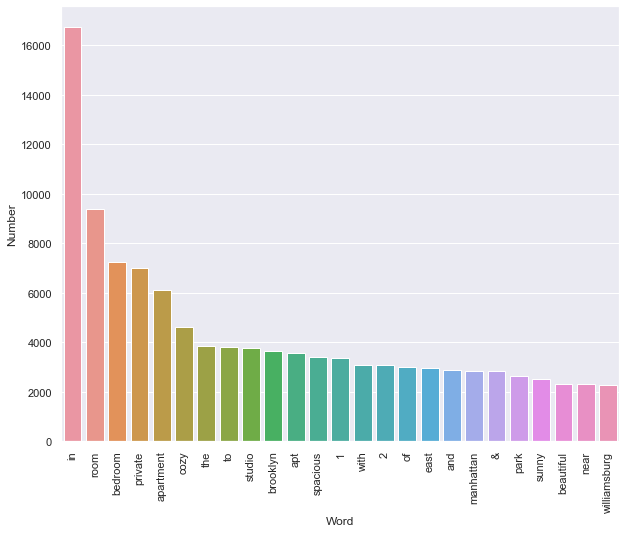

In [118]:
viz = sns.barplot(x='Word', y='Number', data= top_25_df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)

Właściciele najczęsciej wykorzystują proste słowa takie jak room, bedroom czy private.

Na koniec sprawdźmy najczęściej recenzowane miejsca.

In [121]:
top_ten = airbnb.nlargest(10, 'number_of_reviews')
top_ten

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [123]:
top_ten.price.mean()

65.4

Średnia cena za pokój w jednym z najczęściej rezerwowanych miejsc to 65,4$.